<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import math

In [2]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


I want to create a Random Forest model. All my data are numeric. Let's start splitting the data into training and testing.

In [25]:
# get data and label
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)

#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=20,criterion="entropy")

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

(253680, 21)
(253680,)
[0. 0. 0. 0. 0.]
219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
Name: Diabetes_012, dtype: float64
The accuracy is:  83.87535477767265 %


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8420253863134658


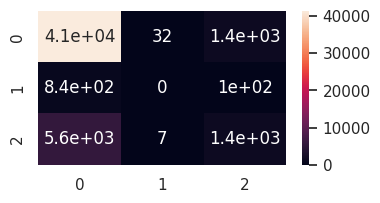

In [29]:
# Creating a Random Forest Classifier instance
model_1 = RandomForestClassifier()

# Setting up parameters for RandomizedSearchCV
k_fold_cv = 5  # Number of cross-validation folds
params = {
    "n_estimators": [10, 50, 100],  # Number of trees in the forest
    "max_features": ["auto", "log2", "sqrt"],  # Maximum number of features to consider for splitting a node
    "bootstrap": [True, False]  # Whether to use bootstrap samples when building trees
}

# Creating a RandomizedSearchCV instance with the specified parameters
clf1 = RandomizedSearchCV(
    model_1,
    param_distributions=params,
    cv=k_fold_cv,
    n_iter=5,  # Number of parameter settings that are sampled
    scoring="accuracy",  # Evaluation metric for cross-validated performance
    verbose=2,  # Controls the verbosity: 0 - silent, 1 - progress bar, 2 - one line per fit
    random_state=42,  # Seed for reproducibility
    n_jobs=-1,  # Number of jobs to run in parallel (-1 means using all processors)
    return_train_score=True  # Whether to include training scores
)

# Fitting the RandomizedSearchCV on the training data
clf1.fit(X_train, y_train)

# Making predictions on the test set using the best estimator from RandomizedSearchCV
pred_final = clf1.predict(X_test)

# Calculating and displaying the confusion matrix
cm = confusion_matrix(y_test, pred_final)
sns.set(rc={"figure.figsize":(4, 2)})
sns.heatmap(cm, annot=True)

# Printing the accuracy score on the test set
print(accuracy_score(y_test, pred_final))

In [4]:
# List of models and their parameter grids for GridSearchCV
grid_models = [(RandomForestClassifier(),[{'n_estimators':[50,100,150,200],'max_depth':[8,10,13],'criterion':['gini','entropy'],'max_features':[1,3,5]}])]

In [23]:
# Loop through models and their parameter grids
for i,j in grid_models:
   # Create a GridSearchCV instance for model 'i' with parameters 'j'
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    # Fit the model on training data
    grid.fit(X_train, y_train)
    # Retrieve and print best accuracy and parameters
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)

RandomForestClassifier():
Best Accuracy : 84.91%
Best Parameters :  {'criterion': 'gini', 'max_depth': 13, 'max_features': 5, 'n_estimators': 100}


In [26]:
# Fit the model on the training data
rf = RandomForestClassifier(max_depth=13, criterion='gini', n_estimators =200, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [17]:
# Make predictions on the test set using the trained Random Forest model
y_pred = rf.predict(X_test)

# Print training set and test set accuracy scores
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.8575
Test set score: 0.8505


In [18]:
# Calculate and print Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.5423368022705771
Root Mean Squared Error : 0.7364351989622557


In [19]:
# Generate and print the classification report for model evaluation
matrix = classification_report(y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.59      0.14      0.22      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.37      0.38     50736
weighted avg       0.81      0.85      0.80     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


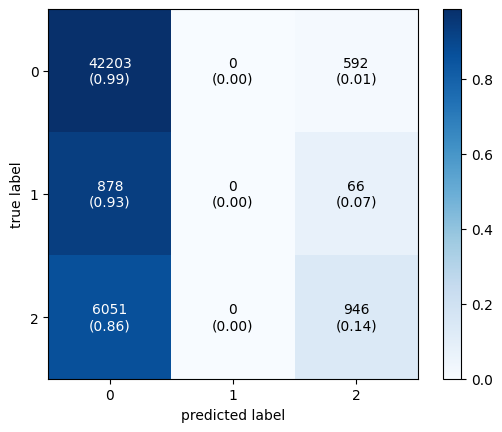

In [21]:
# Calculate and plot the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True,colorbar=True)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize empty lists to store training and testing scores
test_scores = []
train_scores = []

# Iterate over a range of values for the parameter (assuming it's the number of estimators)
for i in range(1, 15):
    # Create a Random Forest Classifier with 'i' number of estimators
    rf = RandomForestClassifier(n_estimators=i)

    # Fit the model on the training data
    rf.fit(X_train, y_train)

    # Append the training and testing scores to their respective lists
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

# Now 'train_scores' and 'test_scores' contain the accuracy scores for different numbers of estimators


In [34]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 98.56462866603594 % and k = [13]


In [36]:
# Find the maximum test score and its corresponding indices in the 'test_scores' list
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

# Print the maximum test score and the corresponding values of 'k'
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))


Max test score 83.640807316304 % and k = [14]


<Axes: >

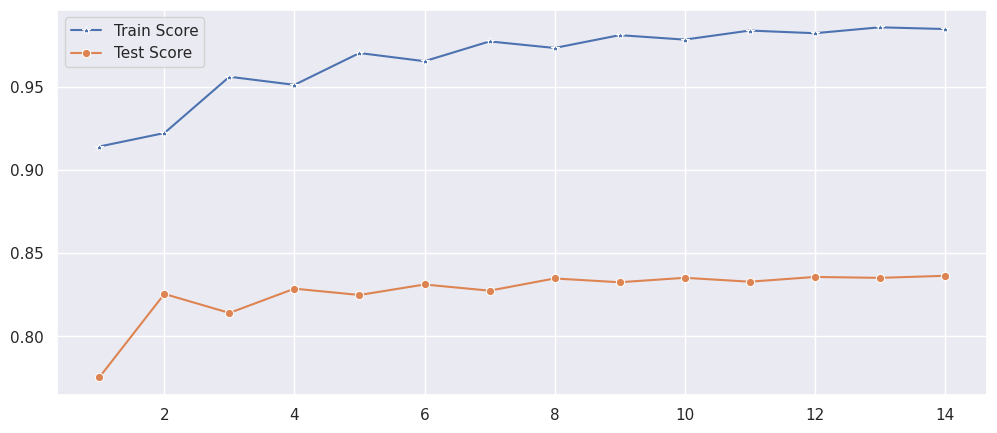

In [40]:
plt.figure(figsize=(12, 5))

# Create a line plot for training scores with '*' markers and label
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')

# Create a line plot for test scores with 'o' markers and label
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')



In [42]:
# Create a Random Forest Classifier with specified hyperparameters
rf = RandomForestClassifier(
    n_estimators=1582,          # Number of trees in the forest
    min_samples_split=100,      # Minimum number of samples required to split an internal node
    min_samples_leaf=10,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',        # Number of features to consider when looking for the best split
    max_depth=15                # Maximum depth of the tree
)

# Train (fit) the model using the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set
accuracy = rf.score(X_test, y_test)

# Print the accuracy on the test set
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.850776568905708


In [43]:
# Get predictions using the classifier fitted above
y_pred = rf.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create and print a cross-tabulation of true vs predicted values
cross_tab = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print("Cross-Tabulation (True vs Predicted):")
print(cross_tab)

Confusion Matrix:
[[42227     0   568]
 [  879     0    65]
 [ 6059     0   938]]
Cross-Tabulation (True vs Predicted):
Predicted    0.0   2.0    All
True                         
0.0        42227   568  42795
1.0          879    65    944
2.0         6059   938   6997
All        49165  1571  50736


Text(0.5, -11.750000000000004, 'Predicted Label')

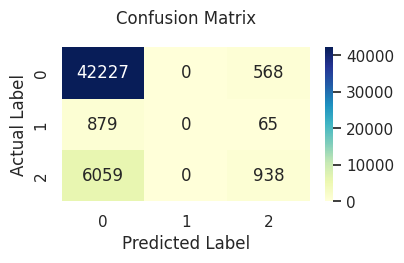

In [46]:
# Get predictions using the classifier fitted above
y_pred = rf.predict(X_test)

# Compute and store the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Set the title and axis labels for better interpretation
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
